In [1]:
# Set up imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random

# Task 1 - Creating a generic function to find minimum of any function

In [2]:
def Find_minimum(fn,start,Temp,dr):
    ans2 = 1e18
    for k in range(100):
        ans1 = 1e18
        #Iterating by shifting the initial point by an offset of +- 10
        for j in range(-10,10):
            x = bestx = start.copy()
            for s in range(len(x)): x[s] += j
            bestcost = 1e18
            n=len(start)
            bestx = x.copy()
            T = Temp
            for i in range(1000):
                # Generate random dx with temperature dependance
                dx = (np.random.random_sample() - 0.5) * T
                for j in range(n):x[j] = bestx[j] + dx
                f = fn(*x)
                if f < bestcost:
                    bestcost = f
                    bestx = x.copy()
                else:
                    toss = np.random.random_sample()
                    #Check if the worse answer can be considerd
                    if toss < np.exp(-(f-bestcost)/T):
                        bestcost = f
                        bestx = x.copy()
                    pass

                T = T * dr
            ans1 = min(ans1,bestcost)
        ans2 = min(ans1,ans2)
    return ans2


## Sample Input 1 - Two variable function

$f(x) = x^2 + \sin(8x)$

In [3]:
def f1(x):
    return x**2 + np.sin(8*x)
start = [-2]
print("The possible minimum value of the given function is ",Find_minimum(f1,start,100000,0.95))

The possible minimum value of the given function is  -0.9626152886641395


## Sample Input 2 - Three variable function
$x^4 + y^4 + z^4 -2x^2- 2y^2- 2z^2 $

In [4]:
def f2(x,y,z):
     return x**4 + y**4 + z**4 - 2*x**2 - 2*y**2 - 2*z**2
start = [5,5,5]

print("The possible minimum value of the given function is ",Find_minimum(f2,start,100000,0.95))

The possible minimum value of the given function is  -2.9999999824438928


# Task 2 - Explanation for the choices

For both the functions I have chosen Temperature as $10^5$, decay rate as 0.95 and the number of iterations to be $10^3$ (All are quite high). 
- Since the range of search depends on temparature,higher temperature implies, the algorithm explores more places. Hence greater chance of getting rid of local minimum

- Similarly I have chosen the decay rate to be close to 1, so that the temparature doesn't come down very rapidly. If it comes down very rapidly again, it fails to explore many places.

- Another important factor is the number of iterations. In order for the algorithm to work properly, the temperature to come very close to zero at the end of last iteration. In my case I have chosen the decay factor to be 0.95 and the number of iterations to be $10^5$ . Therefore the value of temperature at the final iteration will be $0.5^{1000}$ which is $9.33$ x $10^{-302}$. This value is incredibly close to zero. I can further increase the number of iterations by looking at this low value, but increasing it increases the computation time and hence I haven't went with it.

 - Starting point is another important factor. I have chosen a random starting point as in general it is difficult to predict an accurate starting point for complex function. Also I have made a offset of +10 to -10, which can better increase the results. Now based on the value we get we can keep of changing the starting point to arrive close to the actual answer. 

# Task 3 - Getting the path of search


In [5]:
def Find_path(f,T,dr,st):
    bestcost = 1e18
    
    #Generate the limits for the graph
    mi = st - T*(1/(1-dr))/50
    ma = st + T*(1/(1-dr))/50

    xbase = np.linspace(mi,ma,100)
    ybase = f(xbase)
    fig, ax = plt.subplots()
    ax.plot(xbase, ybase)
    xall, yall = [], []
    lnall,  = ax.plot([], [], 'ro')
    lngood, = ax.plot([], [], 'go', markersize=10)
    decayrate = dr
    bestx = st
    T = T

    def onestep(frame):
        nonlocal bestcost, bestx, decayrate, T
        # Generate random dx with temperature dependance
        dx = (np.random.random_sample() - 0.5) * T
        x = bestx + dx
      
        y = f(x)
        if y < bestcost:
            
            bestcost = y
            bestx = x
            lngood.set_data(x, y)
        else:
            #Check if the worse answer can be considered
            toss = np.random.random_sample()
            if toss < np.exp(-(y-bestcost)/T):
                bestcost = y
                bestx = x
                lngood.set_data(x, y)
           
            pass
        T = T * decayrate
        xall.append(x)
        yall.append(y)
        lnall.set_data(xall, yall)
 

    ani= FuncAnimation(fig, onestep, frames=range(100000), interval=100, repeat=False)
    plt.show()
    return ani

The below graph shows one of the path taken by the stimulated annealing algorithm on the function given in the presentation.

$f(x) = x^2 + \sin(8x)$

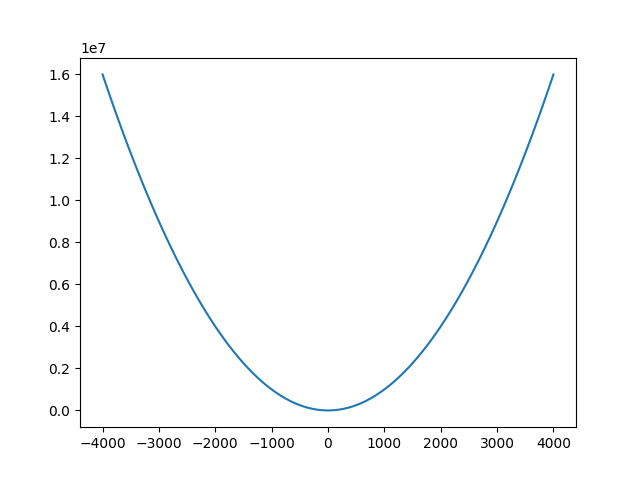

C:\Users\dell\AppData\Local\Temp\ipykernel_20120\402296425.py:30: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  lngood.set_data(x, y)
C:\Users\dell\AppData\Local\Temp\ipykernel_20120\402296425.py:30: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  lngood.set_data(x, y)
C:\Users\dell\AppData\Local\Temp\ipykernel_20120\402296425.py:30: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  lngood.set_data(x, y)
C:\Users\dell\AppData\Local\Temp\ipykernel_20120\402296425.py:30: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  lngood.set_data(x, y)
C:\Users\dell\AppData\Local\Temp\ipykernel_20120\402296425.py:30: MatplotlibDeprecationWarning: 

In [6]:
Find_path(f1,10000,0.95,0)

# Task 4 - The Travelling Salesman Problem

## Defining a Distance function to find the sum of euclidiean distances of a given points in order

In [7]:
def Distance(cities):
    lenn = len(cities)
    dis = 0.0
    # Applying euclid distance formula
    for i in range(lenn-1):
        dis += ((cities[i][0]-cities[i+1][0])**2 + (cities[i][1]-cities[i+1][1])**2)**0.5 

    # Finding the distance between starting and ending point
    dis+= ((cities[0][0]-cities[len(cities)-1][0])**2 + (cities[0][1]-cities[len(cities)-1][1])**2)**0.5 
    return dis

## Creating a generic function to find solution to travelling salesamn problem

In [8]:
def TSM(file,Temp,dr):
    with open(file,'r') as file1:
        cities = []
        each = file1.readlines()
        for l in each:
            if len(l.split()) == 1: pass
            else:
                cities.append([float(l.split()[0]),float(l.split()[1])])
    ans1 = 1e18
    ans2 = cities
    node = cities.copy()
    # Creating a map (Dictionary) to keep track of the initial order of cities
    mapp = {}
    for j in range(len(cities)):
        key = tuple(cities[j])
        mapp[key] = j

    for i in range(5):
        T = Temp
        bestcost = 1e18
        cities = node.copy()

        #Suffling the cities to get different initial cities order, which can impove the answer
        random.shuffle(cities)
        bestx = cities.copy()
        x_coords = [point[0] for point in bestx]
        x_coords.append(x_coords[0])
        y_coords = [point[1] for point in bestx]
        y_coords.append(y_coords[0])
        
        for i in range(100000):
            x = bestx.copy()

            # Using 2-opt optimization technique
            i1,i2 = random.sample(range(len(bestx)),2)
            i3 = min(i1,i2)
            i4 = max(i1,i2)
            x[i3:i4+1] = reversed(x[i3:i4+1])
            y = Distance(x)

            #Stimulated annealing algorithm
            if y < bestcost:
                bestcost = y
                bestx = x.copy()
                x_coord = [point[0] for point in bestx]
                x_coord.append(x_coord[0])
                y_coord = [point[1] for point in bestx]
                y_coord.append(y_coord[0])
            else:
                toss = np.random.random_sample()
                if toss < np.exp(-(y-bestcost)/T):
                    bestcost = y
                    bestx = x.copy()
                    x_coord = [point[0] for point in bestx]
                    x_coord.append(x_coord[0])
                    y_coord = [point[1] for point in bestx]
                    y_coord.append(y_coord[0])
                pass
            T = T * dr
        if (ans1 > bestcost):
           ans1 = bestcost
           ans2 = bestx.copy()
    order = []

    #Getting back the order in which the salesman should travel
    for j in range(len(ans2)):
        order.append(mapp[tuple(ans2[j])])
    return ans1,order,ans2


## Function to animate the problem

In [9]:
def TSMAnimation(file,Temp,dr):
    xmax = xmin = ymax = ymin = 0
    with open(file,'r') as file1:
        cities = []
        each = file1.readlines()
        # Getting the limits for the graph
        for l in each:
            if len(l.split()) == 1: pass
            else:
                xmax = max(float(l.split()[0]),xmax)
                ymax = max(float(l.split()[1]),ymax)
                xmin = min(float(l.split()[0]),xmin)
                ymin = min(float(l.split()[1]),ymin)
                cities.append([float(l.split()[0]),float(l.split()[1])])
    T = Temp
    bestcost = 1e18
    dr = dr
    bestx = cities.copy()

    #Adding the starting point at the end of the list to close the path
    x_coords = [point[0] for point in bestx]
    x_coords.append(x_coords[0])
    y_coords = [point[1] for point in bestx]
    y_coords.append(y_coords[0])

    fig, ax = plt.subplots()
    lngood, = ax.plot([], [],'-go')
    ax.set_ylim(ymin-3,ymax+3)
    ax.set_xlim(xmin-3,xmax+3)

    
    x = cities.copy()
    def onestep(frame):
        nonlocal dr,T,bestcost,bestx

        # 2-opt algorithm
        i1,i2 = random.sample(range(len(bestx)),2)
        x[i1],x[i2] = x[i2],x[i1]
    
        y = Distance(x)

        #Stimulated annealing algorithm
        if y < bestcost:
            bestcost = y
            bestx = x.copy()
            x_coord = [point[0] for point in bestx]
            x_coord.append(x_coord[0])
            y_coord = [point[1] for point in bestx]
            y_coord.append(y_coord[0])
            lngood.set_data(x_coord, y_coord)
        else:
            toss = np.random.random_sample()
            if toss < np.exp(-(y-bestcost)/T):
                bestcost = y
                bestx = x.copy()
                x_coord = [point[0] for point in bestx]
                x_coord.append(x_coord[0])
                y_coord = [point[1] for point in bestx]
                y_coord.append(y_coord[0])
                lngood.set_data(x_coord, y_coord)
            pass
        T = T * dr
    ani= FuncAnimation(fig, onestep, frames=range(1000), interval=100, repeat=False)
    plt.show()
    return ani




## Sample Input 1 - 10 cities

The Minimum distance to travel to all 10 cities and return back is  34.07656139463668
The path taken to achieve it is  [6, 5, 4, 3, 1, 7, 9, 8, 2, 0]


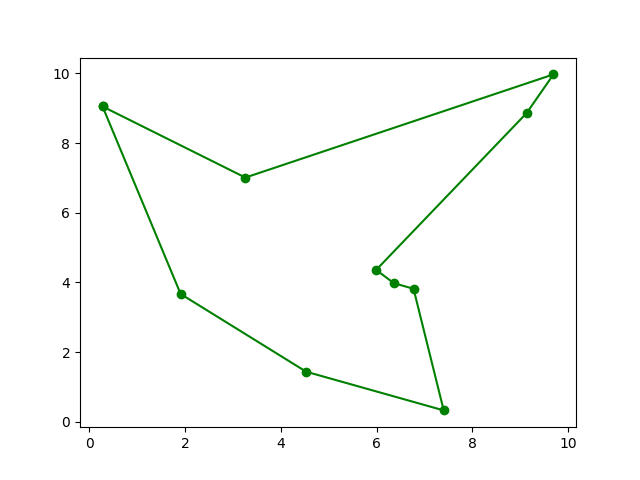

In [10]:
mini,path,cities = TSM("tsp_10_d3677a13b5fe270cadc23ebc7f74800c.txt",1000,0.95)
print("The Minimum distance to travel to all 10 cities and return back is ",mini)
print("The path taken to achieve it is ",path)

x_coord = [point[0] for point in cities]
x_coord.append(x_coord[0])
y_coord = [point[1] for point in cities]
y_coord.append(y_coord[0])

fig = plt.figure()
plt.plot(x_coord,y_coord,'-go')
plt.show()


### Animation for 10 cities

C:\Users\dell\AppData\Local\Temp\ipykernel_20120\402296425.py:37: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  lngood.set_data(x, y)


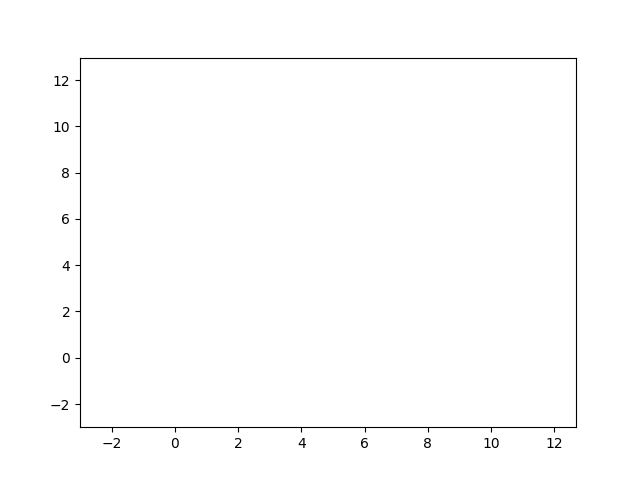

In [11]:
TSMAnimation("tsp_10_d3677a13b5fe270cadc23ebc7f74800c.txt",1000,0.99)

## Sample Input 2 - 100 cities

In [12]:
mini,path,cities = TSM("tsp_100_7726580e4d4838a1a45deee27a2d892c.txt",1000,0.95)
print("The Minimum distance to travel to all 100 cities and return back is ",mini)
print("The path taken to achieve it is ",path)

x_coord = [point[0] for point in cities]
x_coord.append(x_coord[0])
y_coord = [point[1] for point in cities]
y_coord.append(y_coord[0])

fig = plt.figure()
plt.plot(x_coord,y_coord,'-go')
plt.show()

### Animation for 100 cities

In [ ]:
print(TSM("tsp_10_d3677a13b5fe270cadc23ebc7f74800c.txt",1000,0.95))

# Results and Explanation
 
- Minimum distance for the salesman to explore all 10 cities and come back is 34.07656139463668

- The best minimum distance for the salesman to explore all 100 cities and come back is 79.84821351340528. There are the best results I could get from my approch.

- Again here the choice of temperature and decay factor we made the way they are (1000 and 0.95 repectively), inorder to widen the search area and imporvise the result. (Similar to the previous question)

- Now, inorder to imporvise the results, I shuffled the array in random order for certain iterations. And in nested loop i did $10^5$ iterations to find the bestcost . And also I used 2-opt algorithm to shuffle the cities order. In this algorithm, first gererate two random index, let's say i and j. Now reverse the list from i to j and continue with stimulated annealing. This indeed gave a better solution than just random shuffling
